# Practical Statistics for Data Scientists
## Exploratory Data Analysis

This Notebook is the python equivalent of the R code for Chapter-1, from the book <a href="http://shop.oreilly.com/product/0636920048992.do">Practical Statistics for Data Scientists</a> by Peter Bruce and Andrew Bruce. This <a href="https://github.com/andrewgbruce/statistics-for-data-scientists">GitHub</a> repository has the complete R code for the book.

The authors note that the aim of the book is to be a "Desk Reference" for key Statistical concepts that are relevant to Data Science, explaining their importance and the reason behind that choice.

Data that is used in the book, has been curated by the authors and made available on <a href="https://drive.google.com/drive/folders/0B98qpkK5EJemYnJ1ajA1ZVJwMzg">Google Drive</a> and <a href="https://www.dropbox.com/sh/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra?dl=0">Dropbox</a>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<br>

### Correlation

When the data points follow a roughly straight-line trend, the variables are said to have an approximately linear relationship. In some cases, the data points fall close to a straight line, but more often there is quite a bit of variability of the points around the straight-line trend. A summary measure called the correlation describes the strength of the linear association.

Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1.
<ul>
<li>A positive value for r indicates a positive association, and a negative value for r indicates a negative association.</li>
<li>The <b>closer r is to 1</b> the closer the data points fall to a straight line, thus the linear association is <b>stronger.</b> The <b>closer r is to 0</b>, making the linear association <b>weaker</b>.</li>
</ul>

In [2]:
# Read the S&P 500 data from a .csv file
sp500DailyReturns = pd.read_csv("../data/sp500_px.csv") # S&P 500 Daily Returns
sp500Symbols = pd.read_csv("../data/sp500_sym.csv")# Selected S&P Symbols

In [3]:
sp500ETFSymbols = pd.DataFrame()

In [4]:
sp500ETFSymbols = sp500Symbols.loc[sp500Symbols['sector'] == 'etf', ['symbol']]

In [5]:
print(sp500ETFSymbols)

    symbol
315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK


In [6]:
sp500DailyReturns.head(10)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.347160,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.231440,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.115720,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.086790,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.144650,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0
5,1993-02-05,0.0,0.030058,0.093892,0.0,0.0,0.094453,-0.047907,0.046575,0.172760,...,0.0,0.0,-0.332691,0.0,-0.08333,-0.01041,0.015574,-0.75,-0.0625,0.0
6,1993-02-08,0.0,0.030066,-0.060750,0.0,0.0,-0.113350,-0.011057,0.116436,-0.043190,...,0.0,0.0,-0.549670,0.0,-0.08333,0.00000,0.000000,0.00,-0.1250,0.0
7,1993-02-09,0.0,-0.090190,-0.063521,0.0,0.0,-0.132239,-0.014746,0.069862,-0.115169,...,0.0,0.0,0.159119,0.0,-0.04167,-0.02605,0.007782,-0.75,0.0000,0.0
8,1993-02-10,0.0,0.120257,0.022100,0.0,0.0,0.094453,0.014746,-0.256160,0.014394,...,0.0,0.0,0.173580,0.0,0.08334,-0.01562,-0.015564,0.25,0.0625,0.0
9,1993-02-11,0.0,0.030058,-0.022093,0.0,0.0,-0.018897,0.014746,-0.139724,-0.043190,...,0.0,0.0,-0.086790,0.0,0.04166,0.00521,0.000000,0.25,-0.2500,0.0


In [7]:
newSP500DF = sp500DailyReturns.loc[sp500DailyReturns['Unnamed: 0'] > '2012-07-01', sp500ETFSymbols["symbol"].values]

In [8]:
newSP500DF.head(10)

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
4893,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
4894,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
4895,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
4896,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
4897,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
4898,-0.733400,-0.943887,-1.759260,-1.503506,-2.980011,9.92,-0.630002,-1.412963,-1.343584,-0.459646,0.017875,-0.656002,0.000000,-0.381215,-0.082985,-0.208985,-0.406716
4899,-0.244464,-0.260052,-0.047042,-0.485600,0.410003,-6.88,0.380001,-0.315054,0.507361,-0.229821,0.107248,-0.215543,0.000000,0.000000,-0.110646,0.104492,-0.104044
4900,0.065818,-0.086684,0.122292,0.336188,1.330001,-3.84,0.360001,0.334147,0.526164,0.134062,0.071497,0.215542,0.000000,0.123893,0.082986,-0.018999,-0.075668
4901,0.554749,0.751261,1.778079,1.587556,0.690002,-9.92,0.290001,0.668292,0.826819,0.612860,0.223435,0.477946,0.000000,0.390749,0.267398,0.313477,0.293214
4902,-0.075218,-0.038527,-0.009416,-0.121398,-0.219986,-2.24,0.320000,-0.162306,0.404015,-0.038305,0.017876,-0.056226,0.000000,0.104836,-0.082985,-0.037997,-0.028375


In [9]:
corrSP500 = newSP500DF.corr()

### Correlation Matrix

In [10]:
print(corrSP500)

          XLI       QQQ       SPY       DIA       GLD       VXX       USO  \
XLI  1.000000  0.785865  0.888865  0.869680  0.056554 -0.468196  0.236881   
QQQ  0.785865  1.000000  0.908995  0.834440  0.043553 -0.470555  0.199492   
SPY  0.888865  0.908995  1.000000  0.953726  0.078722 -0.547074  0.272069   
DIA  0.869680  0.834440  0.953726  1.000000  0.051523 -0.511327  0.256793   
GLD  0.056554  0.043553  0.078722  0.051523  1.000000 -0.107488  0.216563   
VXX -0.468196 -0.470555 -0.547074 -0.511327 -0.107488  1.000000 -0.195397   
USO  0.236881  0.199492  0.272069  0.256793  0.216563 -0.195397  1.000000   
IWM  0.782380  0.810158  0.833937  0.758012  0.070110 -0.448942  0.249799   
XLE  0.650054  0.560044  0.713300  0.658311  0.188625 -0.448474  0.525943   
XLY  0.798080  0.839701  0.887028  0.847043  0.017467 -0.474756  0.183275   
XLU  0.380809  0.346667  0.481928  0.463364  0.121611 -0.260395  0.113182   
XLB  0.784144  0.713463  0.826053  0.787415  0.184366 -0.470890  0.324166   

<br>

### Correlation Plot

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

ax.set_label("Correlation Coefficient")
ax.set_title("Correlation between ETF returns")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [12]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrSP500, cmap=cmap, vmax= 1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, "label": 'Correlation Coefficient'})

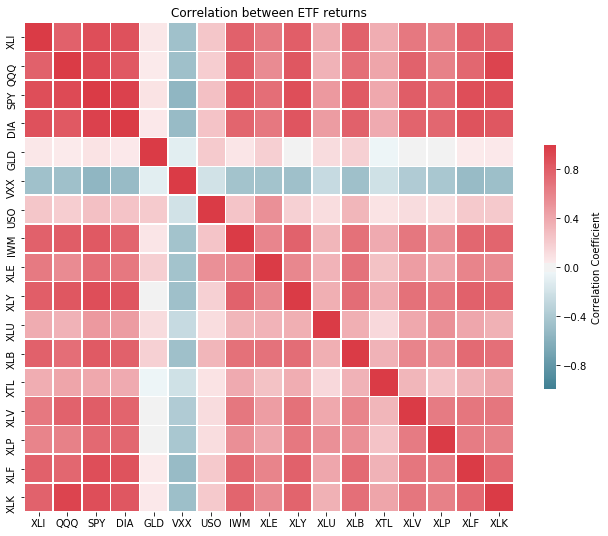

In [13]:
plt.show()

<br>

### Scatter Plot

A Scatter Plot is a common and easy way to display the relation between two numeric-variables x and y.

A scatter plot indicates the <b>direction of a relationship</b> between the variables. Articulation of direction develops when there is either:
<ul>
<li>High values of one variable occurring with high values of the other variable or low values of one variable occurring
with low values of the other variable.</li>

<li>High values of one variable occurring with low values of the other variable.</li>
</ul>

The <b>strength of the relationship</b> can be gauged by looking at the scatter plot and seeing how close the points are to a line.

A scatterplot can reveal, the <b>overall pattern</b> and any <b>deviations</b> from the pattern, when observed correctly.

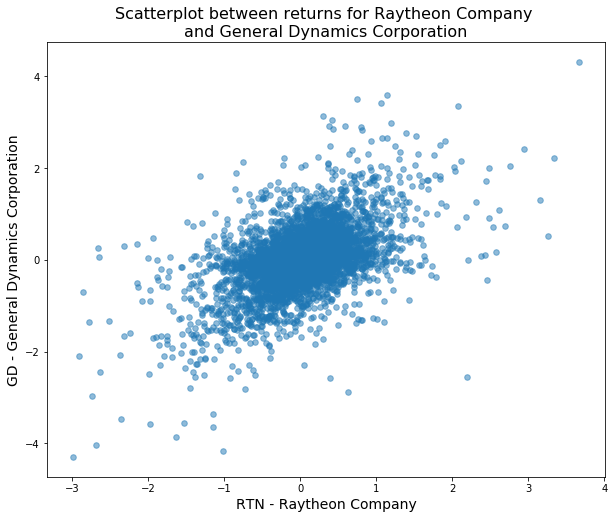

In [14]:

area = np.pi*10

plt.figure(figsize=(10, 8))

# Plot
plt.scatter(sp500DailyReturns.RTN, sp500DailyReturns.GD, s=area, alpha=0.5)
plt.title('Scatterplot between returns for Raytheon Company \nand General Dynamics Corporation', fontsize=16)
plt.xlabel('RTN - Raytheon Company', fontsize=14)
plt.ylabel('GD - General Dynamics Corporation', fontsize=14)

plt.show()